# Document Loading

## Retrieval augmented generation

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).


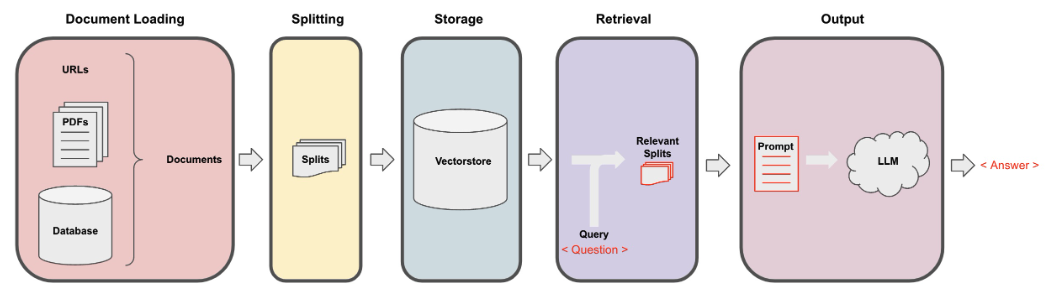

In [ ]:
!pip install langchain

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

## PDFs

Let's load a PDF [transcript](https://see.stanford.edu/materials/aimlcs229/transcripts/MachineLearning-Lecture01.pdf) from Andrew Ng's famous CS229 course! These documents are the result of automated transcription so words and sentences are sometimes split unexpectedly.

In [ ]:
# The course will show the pip installs you would need to install packages on your own machine.
# These packages are already installed on this platform and should not be run again.
#! pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [ ]:
len(pages)

22

In [ ]:
page = pages[0]

In [ ]:
print(page.page_content[0:500])

MachineLearning-Lecture01  
Instructor (Andrew Ng):  Okay. Good morning. Welcome to CS229, the machine 
learning class. So what I wanna do today is ju st spend a little time going over the logistics 
of the class, and then we'll start to  talk a bit about machine learning.  
By way of introduction, my name's  Andrew Ng and I'll be instru ctor for this class. And so 
I personally work in machine learning, and I' ve worked on it for about 15 years now, and 
I actually think that machine learning i


In [ ]:
page.metadata

{'source': 'docs/cs229_lectures/MachineLearning-Lecture01.pdf', 'page': 0}

## YouTube

In [ ]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [ ]:
!pip install --upgrade yt_dlp
!pip install pydub

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 114.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable


**Note**: This can take several minutes to complete.

In [ ]:
url="https://www.youtube.com/watch?v=jGwO_UgTS7I"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
docs = loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=jGwO_UgTS7I
[youtube] jGwO_UgTS7I: Downloading webpage
[youtube] jGwO_UgTS7I: Downloading ios player API JSON
[youtube] jGwO_UgTS7I: Downloading android player API JSON


[youtube] jGwO_UgTS7I: Downloading android player API JSON


[youtube] jGwO_UgTS7I: Downloading android player API JSON


[youtube] jGwO_UgTS7I: Downloading android player API JSON


ERROR: [youtube] jGwO_UgTS7I: Sign in to confirm you’re not a bot. This helps protect our community. Learn more


DownloadError: ERROR: [youtube] jGwO_UgTS7I: Sign in to confirm you’re not a bot. This helps protect our community. Learn more

In [ ]:
docs[0].page_content[0:500]

"# Blendle's Employee Handbook\n\nThis is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that will continue to change. \n\n**Everything related to working at Blendle and the people of Blendle, made public.**\n\nThese are the lessons from three years of working with the people of Blendle. It contains everything from [how our leaders lead](https://www.notion.so/ecfb7e647136468a9a0a32f1771a8f52?pv"

## URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")

In [ ]:
docs = loader.load()

In [ ]:
print(docs[0].page_content[:500])




















































































File not found · GitHub













































Skip to content













Navigation Menu

Toggle navigation




 













            Sign in
          








        Product
        













GitHub Copilot
        Write better code with AI
      







Security
        Find and fix vulnerabilities
      







Actions
        Automate any workflow
      







Codespaces
  


## Notion

Follow steps [here](https://python.langchain.com/docs/modules/data_connection/document_loaders/integrations/notion) for an example Notion site such as [this one](https://yolospace.notion.site/Blendle-s-Employee-Handbook-e31bff7da17346ee99f531087d8b133f):

* Duplicate the page into your own Notion space and export as `Markdown / CSV`.
* Unzip it and save it as a folder that contains the markdown file for the Notion page.


![image.png](./img/image.png)

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()

In [ ]:
print(docs[0].page_content[0:200])

# Blendle's Employee Handbook

This is a living document with everything we've learned working with people while running a startup. And, of course, we continue to learn. Therefore it's a document that


In [ ]:
docs[0].metadata

{'source': "docs/Notion_DB/Blendle's Employee Handbook e367aa77e225482c849111687e114a56.md"}